## PART-1

In [1]:
import pandas as pd
# import the csv file
input_file = "./Wholesale_customers_data.csv"
wholesale = pd.read_csv(input_file)
wholesale.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# Want to see more about data?
wholesale.describe
#Let's see what is off the table
for i in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']:
 print('Maximum of ',i, ' is',wholesale[i].max(), ' while mean value is ',wholesale[i].mean())

Maximum of  Fresh  is 112151  while mean value is  12000.297727272728
Maximum of  Milk  is 73498  while mean value is  5796.265909090909
Maximum of  Grocery  is 92780  while mean value is  7951.277272727273
Maximum of  Frozen  is 60869  while mean value is  3071.931818181818
Maximum of  Detergents_Paper  is 40827  while mean value is  2881.4931818181817
Maximum of  Delicassen  is 47943  while mean value is  1524.8704545454545


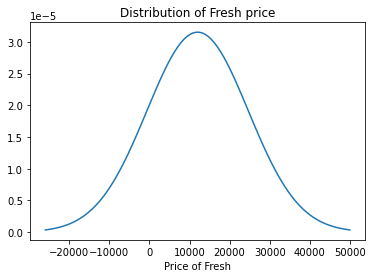

In [5]:
# What if we fit a normal distribution to one of the variables
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
mu = wholesale['Fresh'].mean()
sigma = wholesale['Fresh'].std()
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
#x_axis = np.arange(0, 10, 0.001) #plt.plot(wholesale['Fresh'].max(), norm.pdf(x,mu,sigma)) plt.axvline(x=mu,color='r')
plt.plot(x, norm.pdf(x,mu,sigma)) #plt.plot([wholesale['Fresh'].max()], [0], marker='o', markersize=3, color="red")
plt.title('Distribution of Fresh price')
plt.xlabel('Price of Fresh')
plt.show()

In [6]:
from scipy import stats
'''For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint. Finally, result of this condition is used to index the dataframe.''' 
wholesale_new = wholesale[(np.abs(stats.zscore(wholesale)) < 3).all(axis=1)] 
wholesale_new = wholesale_new.drop(['Channel', 'Region'], axis= 1) 
wholesale_new.describe()
# How many data points were dropped?
print('Number of dropped instances= ', wholesale.shape[0]- wholesale_new.shape[0])

Number of dropped instances=  26


In [7]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=76964057).fit(wholesale_new)
kmeans.cluster_centers_

array([[ 5601.90243902, 13389.90243902, 21652.53658537,  1694.12195122,
         9204.        ,  1678.51219512],
       [ 4162.7721519 ,  7627.49367089, 10667.25316456,  1331.39240506,
         4609.58227848,  1411.5443038 ],
       [ 5043.85416667,  2312.11805556,  2759.42361111,  2584.42361111,
          651.02777778,   838.83333333],
       [31873.80434783,  4961.95652174,  5597.04347826,  4014.2173913 ,
         1002.43478261,  1790.39130435],
       [16188.66346154,  2925.21153846,  4189.67307692,  3117.38461538,
          973.11538462,  1240.63461538]])

In [8]:
pd.DataFrame(data=kmeans.cluster_centers_, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5601.902439,13389.902439,21652.536585,1694.121951,9204.000000,1678.512195
1,4162.772152,7627.493671,10667.253165,1331.392405,4609.582278,1411.544304
2,5043.854167,2312.118056,2759.423611,2584.423611,651.027778,838.833333
3,31873.804348,4961.956522,5597.043478,4014.217391,1002.434783,1790.391304
4,16188.663462,2925.211538,4189.673077,3117.384615,973.115385,1240.634615


At k=  2 The percentage of change in SSE is  38.0597606028824 %
At k=  3 The percentage of change in SSE is  36.7913967944305 %
At k=  4 The percentage of change in SSE is  19.94915206028665 %
At k=  5 The percentage of change in SSE is  15.635519627808378 %
At k=  6 The percentage of change in SSE is  11.295115791504164 %
At k=  7 The percentage of change in SSE is  8.833462851954527 %
At k=  8 The percentage of change in SSE is  7.0617745977338275 %
At k=  9 The percentage of change in SSE is  6.5803062615751475 %
At k=  10 The percentage of change in SSE is  5.571992494841826 %
At k=  11 The percentage of change in SSE is  7.054703473127493 %
At k=  12 The percentage of change in SSE is  3.692432627569809 %
At k=  13 The percentage of change in SSE is  5.992731865415148 %
At k=  14 The percentage of change in SSE is  5.361861124884759 %
At k=  15 The percentage of change in SSE is  5.899747351111475 %
At k=  16 The percentage of change in SSE is  4.167879364644005 %
At k=  17 The pe

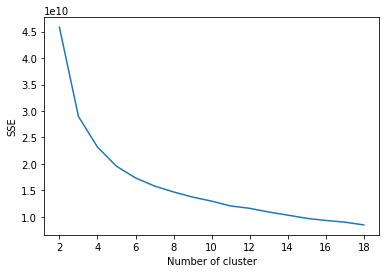

In [9]:
sse = {}
last_sse = 73984012841.4855 
for k in range(2, 19):
    kmeans = KMeans(n_clusters=k, random_state=76964057).fit(wholesale_new) 
    wholesale_new["clusters"] = kmeans.labels_
#print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster") 
plt.ylabel("SSE")
plt.show()

#### Q1. Given this is an imperfect real-world, you need to determine what you believe is the best value for “k” and write-up this portion of your lab report 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k. If the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). 

The best value for K here is 4.

#### Q2. How many points do you see in each cluster?

In [10]:
pd.Series(kmeans.labels_).value_counts()

0     54
4     50
16    47
6     38
10    36
2     34
13    20
1     19
12    19
11    18
9     17
3     14
5     14
8     13
7     10
17     5
14     4
15     2
dtype: int64

The number of data points for the K-value of 4 (or if the data set is divided into 4 clusters) is 50.

## PART-2 

In [11]:
input_file = "./wine.csv" 
wine = pd.read_csv(input_file) 
wine.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


At k=  2 The percentage of change in SSE is  74.17179849353498 %
At k=  3 The percentage of change in SSE is  47.82453814618579 %
At k=  4 The percentage of change in SSE is  43.76290393092094 %
At k=  5 The percentage of change in SSE is  31.26272599531727 %
At k=  6 The percentage of change in SSE is  29.355404307904937 %
At k=  7 The percentage of change in SSE is  36.30582495188441 %
At k=  8 The percentage of change in SSE is  21.31162611597545 %
At k=  9 The percentage of change in SSE is  16.705478681868115 %
At k=  10 The percentage of change in SSE is  19.171090469523477 %
At k=  11 The percentage of change in SSE is  14.678107631265991 %
At k=  12 The percentage of change in SSE is  14.701842390101547 %
At k=  13 The percentage of change in SSE is  10.016590140404528 %
At k=  14 The percentage of change in SSE is  10.18142281388603 %


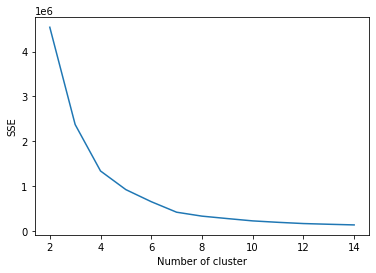

In [12]:
sse = {} 
last_sse = 17592402.70373319 
for k in range(2, 15): 
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(wine) 
    wine["clusters"] = kmeans.labels_  
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center 
    change_per = (last_sse-kmeans.inertia_)/last_sse*100 
    print ('At k= ', k ,'The percentage of change in SSE is ',change_per,'%')
    last_sse = kmeans.inertia_ 
plt.figure() 
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster") 
plt.ylabel("SSE") 
plt.show()

The best value of K is 3, ie if the data set is divided into 3 clusters, we get the best value of sse (sum of squared errors). 

In [13]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(wine) 
pd.Series(kmeans.labels_).value_counts() 

1    69
2    62
0    47
dtype: int64

In [14]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
# Make a comparison between actual wine type and the predicted one
confusion_matrix(kmeans.labels_, wine['Wine']-1) 

array([[46,  1,  0],
       [ 0, 50, 19],
       [13, 20, 29]])

In [15]:
accuracy_score(kmeans.labels_, wine['Wine']-1)*100 

70.2247191011236

## PART-3

In [16]:
import numpy as np 
from sklearn.model_selection import train_test_split 
y = kmeans.labels_
X = wine.drop(['Wine'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
X_train.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,clusters
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,3
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,10
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,1
102,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438,9
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,4


In [19]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
model = tree.DecisionTreeClassifier() 
model = model.fit(X_train, y_train)

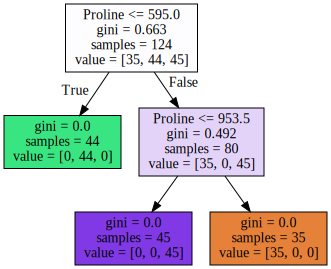

In [20]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None ,feature_names=X.columns, filled = True)) 
display(SVG(graph.pipe(format='svg')))

In [21]:
# predicting model performance
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

# Training dataset
y_predict = model.predict(X_train) 
print(confusion_matrix(y_train, y_predict))
print(accuracy_score(y_train, y_predict)*100)
# Test dataset
y_predict = model.predict(X_test) 
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[35  0  0]
 [ 0 44  0]
 [ 0  0 45]]
100.0
[[12  0  0]
 [ 0 25  0]
 [ 0  0 17]]
100.0


If we see the classes assigned based on k-means analysis , The classification was completley done based on the value of Proline. Which is resulting in 100% Accuracy. So we can say that there is some misclassification.

## PART-4

#### Q3. Load the dataset of breast cancer. Do the preliminary analysis and implement a KNN (K- nearest neighbors) model for this dataset and don’t forget that whenever it is required you should use: set.seed(12345). You can use following command and don’t forget to scale the data prior to design the model. 

In [22]:
input_file = "./wisc_bc_data.csv" 
breast_cancer = pd.read_csv(input_file) 
breast_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import scale 
numbers = LabelEncoder() 
y = numbers.fit_transform(breast_cancer['diagnosis'].astype('str'))
X = scale(breast_cancer.drop(['id','diagnosis'], axis=1)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [24]:
# the number of neighbors is 21 (k=21) - this is the square root of the number of training records
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=21) 
neigh.fit(X, y) 

KNeighborsClassifier(n_neighbors=21)

In [25]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predict = neigh.predict(X_test) 
print(confusion_matrix(y_test, y_predict))

[[76  0]
 [ 3 35]]


In [26]:
print("accuracy= ",accuracy_score(y_test, y_predict)*100)

accuracy=  97.36842105263158


Ans: The Accuracy is 97.3%

#### Q4. Now let’s get back to our problem of news popularity and see if we can apply KNN (K- nearest neighbors) to improve the accuracy of the model. Use the same strategy of training and testing that we did on first 2 labs, and don’t forget that whenever it is required you should use: set.seed(12345). Use PCA to reduce the number of features.

In [27]:
import pandas as pd
# Read the csv file
news = pd.read_csv("./NewsPopularity.csv")
news.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
X = news[0:58]
Y = news['shares']

In [29]:
# get the statistics of original attributes 
data = news[news.keys()[-1]]
data.describe()
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(data>=1400))

In [30]:
popular = news.shares >= 1400
unpopular = news.shares < 1400
news.loc[popular,'shares'] = 1
news.loc[unpopular,'shares'] = 0

In [31]:
features=list(news.columns[2:60])

In [32]:
# split dataset to 70-30 training and testing resp.
X_train, X_test, y_train, y_test = train_test_split(news[features], news['shares'], test_size=0.30 ,random_state=12345)

#Shape of  training and test datasets
print(X_train.shape)
print(y_train.shape)

(27750, 58)
(27750,)


### Prinicipal Component Analysis (PCA) - News Popularity Dataset

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [34]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues 
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

Raw Eigenvalues: 
 [ 4.81126318e+00  3.99782401e+00  3.60110200e+00  3.00358880e+00
  2.72579379e+00  2.55137034e+00  2.44024932e+00  2.22900065e+00
  2.12613756e+00  2.02616438e+00  2.00345330e+00  1.88346719e+00
  1.62322526e+00  1.37550470e+00  1.35361458e+00  1.23942997e+00
  1.22670125e+00  1.22019235e+00  1.18877600e+00  1.16285389e+00
  1.12483809e+00  1.07863560e+00  1.04634642e+00  9.06579037e-01
  8.78809434e-01  8.02368687e-01  7.17870665e-01  6.72963049e-01
  6.56888623e-01  6.06264482e-01  5.73041295e-01  5.60475426e-01
  5.35621241e-01  4.91901347e-01  4.44398488e-01  4.60344953e-01
  3.63900062e-01  3.17283506e-01  3.01414975e-01  2.42548288e-01
  2.46029139e-01  2.23190195e-01  1.94030343e-01  1.82554026e-01
  1.29223598e-01  9.79069924e-02  8.08828409e-02  7.01397429e-02
  6.01866823e-02  5.06412939e-02  2.62529866e-02  3.57368940e-02
  3.29009642e-02  1.75935612e-04  3.23264389e-05  3.38535749e-10
  9.73174433e-16 -1.83075291e-15]
Percentage of Variance Explained by E

In [35]:
# let's look at the cumulative variance described by each component
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.08294982, 0.15187534, 0.21396107, 0.26574522, 0.31273997,
       0.35672753, 0.39879927, 0.43722893, 0.47388516, 0.50881777,
       0.54335882, 0.57583122, 0.60381686, 0.6275316 , 0.65086894,
       0.67223765, 0.69338691, 0.71442395, 0.73491935, 0.75496784,
       0.7743609 , 0.79295739, 0.8109972 , 0.82662731, 0.84177865,
       0.85561209, 0.86798873, 0.87959112, 0.89091638, 0.90136884,
       0.9112485 , 0.92091153, 0.93014604, 0.93862679, 0.94656349,
       0.95422526, 0.96049917, 0.96596938, 0.971166  , 0.97540773,
       0.97958945, 0.98343741, 0.98678264, 0.98993001, 0.99215793,
       0.99384592, 0.9952404 , 0.99644966, 0.99748733, 0.99836042,
       0.99897655, 0.99954379, 0.99999641, 0.99999944, 1.        ,
       1.        , 1.        , 1.        ])

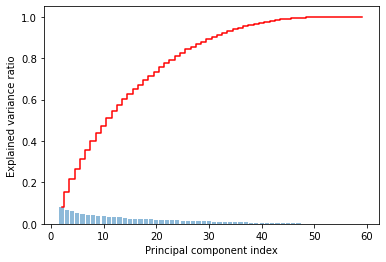

In [36]:
# make a bar plot of the variance associated with each component
import matplotlib.pyplot as plt

plt.bar(range(2,60), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(2,60), cum_var_exp, where='mid',
         label='Cumulative explained variance',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
# fit_transform() is used to calculate the PCAs from training data
X_train_pca = pca.fit_transform(X_train_std)

# to get the fit statistics (variance explained per component)
print("sklearn var:\n", pca.explained_variance_ratio_)
print("numpy var: \n", eigen_vals/sum(eigen_vals))

sklearn var:
 [8.29498242e-02 6.89255163e-02 6.20857281e-02 5.17841475e-02
 4.69947511e-02 4.39875586e-02 4.20717480e-02 3.84296608e-02
 3.66562231e-02 3.49326097e-02 3.45410535e-02 3.24724020e-02
 2.79856338e-02 2.37147436e-02 2.33373414e-02 2.13687122e-02
 2.11492595e-02 2.10370411e-02 2.04953994e-02 2.00484826e-02
 1.93930613e-02 1.85964954e-02 1.80398054e-02 1.56301098e-02
 1.51513408e-02 1.38334444e-02 1.23766344e-02 1.16023931e-02
 1.13252578e-02 1.04524592e-02 9.87966630e-03 9.66302118e-03
 9.23451620e-03 8.48075209e-03 7.93669592e-03 7.66176679e-03
 6.27391290e-03 5.47020815e-03 5.19662265e-03 4.24172885e-03
 4.18171634e-03 3.84796813e-03 3.34523020e-03 3.14736979e-03
 2.22791277e-03 1.68799076e-03 1.39448149e-03 1.20926233e-03
 1.03766402e-03 8.73094294e-04 6.16131142e-04 5.67237562e-04
 4.52621389e-04 3.03326331e-06 5.57332310e-07 5.83661484e-12
 7.30493647e-32 1.98500907e-32]
numpy var: 
 [ 8.29498242e-02  6.89255163e-02  6.20857281e-02  5.17841475e-02
  4.69947511e-02  4.39

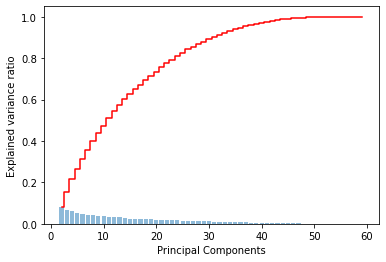

In [38]:
plt.bar(range(2,60), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(2,60), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

# we can either use number of componets
# or cumulative explained variance ratio
# like PCA(0.95)
pca = PCA(n_components=20) # selecting first 20 important features out of 58.

# fit_transform() to calculate the coordinate system
X_train_pca = pca.fit_transform(X_train_std)
# transform() to apply that coordinate system
X_test_pca = pca.transform(X_test_std)

In [40]:
# the number of neighbors is 21 (k=21) - this is the square root of the number of training records
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=166) 
neigh.fit(X_train_pca, y_train) 

KNeighborsClassifier(n_neighbors=166)

In [41]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
y_predict = neigh.predict(X_test_pca) 
print(confusion_matrix(y_test, y_predict))

[[3160 2331]
 [1936 4467]]


In [42]:
print("accuracy= ", accuracy_score(y_test, y_predict)*100)

accuracy=  64.12476879098705


#### The Accuracy of the model after doing prinicipal component analysis (PCA)and selecting 20 features is 64.11%. which is close to the accuracy decision tree model (58.6%) and random forest classifier (66.8%).  